Multiple Mask/Ground Truth Augmentation Using the DataPipeline

In [5]:
# !pip install natsort
# !pip3 install Augmentor

In [6]:
# Some imports we will need for this notebook
import Augmentor
import numpy as np
from PIL import Image
import glob
from natsort import natsorted
import os
import random
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Reading and sorting the image paths from the directories
ground_truth_images = natsorted(glob.glob("Augmentation/image/*"))
segmentation_mask_images = natsorted(glob.glob("Augmentation/label/*"))

In [22]:
ground_truth_images

['Augmentation/image/0547296_post0000.jpg',
 'Augmentation/image/0547296_pre0000.jpg',
 'Augmentation/image/1271173_pre0000.jpg',
 'Augmentation/image/1663331_post0000.jpg',
 'Augmentation/image/1663331_pre0000.jpg',
 'Augmentation/image/1713070_pre0000.jpg',
 'Augmentation/image/2354520_post0000.jpg',
 'Augmentation/image/2354520_pre0000.jpg',
 'Augmentation/image/2743812_post0000.jpg',
 'Augmentation/image/2743812_pre0000.jpg',
 'Augmentation/image/2750667_post0000.jpg',
 'Augmentation/image/2802224_post0000.jpg',
 'Augmentation/image/2802224_pre0000.jpg',
 'Augmentation/image/2802566_post0000.jpg',
 'Augmentation/image/2821463_pre0000.jpg']

In [23]:
segmentation_mask_images

['Augmentation/label/0547296_post0000.png',
 'Augmentation/label/0547296_pre0000.png',
 'Augmentation/label/1271173_pre0000.png',
 'Augmentation/label/1663331_post0000.png',
 'Augmentation/label/1663331_pre0000.png',
 'Augmentation/label/1713070_pre0000.png',
 'Augmentation/label/2354520_post0000.png',
 'Augmentation/label/2354520_pre0000.png',
 'Augmentation/label/2743812_post0000.png',
 'Augmentation/label/2743812_pre0000.png',
 'Augmentation/label/2750667_post0000.png',
 'Augmentation/label/2802224_post0000.png',
 'Augmentation/label/2802224_pre0000.png',
 'Augmentation/label/2802566_post0000.png',
 'Augmentation/label/2821463_pre0000.png']

In [24]:
for i in range(0, len(ground_truth_images)):
    print("%s: Ground: %s | Mask 1: %s " % 
          (i+1, os.path.basename(ground_truth_images[i]),
           os.path.basename(segmentation_mask_images[i])))

1: Ground: 0547296_post0000.jpg | Mask 1: 0547296_post0000.png 
2: Ground: 0547296_pre0000.jpg | Mask 1: 0547296_pre0000.png 
3: Ground: 1271173_pre0000.jpg | Mask 1: 1271173_pre0000.png 
4: Ground: 1663331_post0000.jpg | Mask 1: 1663331_post0000.png 
5: Ground: 1663331_pre0000.jpg | Mask 1: 1663331_pre0000.png 
6: Ground: 1713070_pre0000.jpg | Mask 1: 1713070_pre0000.png 
7: Ground: 2354520_post0000.jpg | Mask 1: 2354520_post0000.png 
8: Ground: 2354520_pre0000.jpg | Mask 1: 2354520_pre0000.png 
9: Ground: 2743812_post0000.jpg | Mask 1: 2743812_post0000.png 
10: Ground: 2743812_pre0000.jpg | Mask 1: 2743812_pre0000.png 
11: Ground: 2750667_post0000.jpg | Mask 1: 2750667_post0000.png 
12: Ground: 2802224_post0000.jpg | Mask 1: 2802224_post0000.png 
13: Ground: 2802224_pre0000.jpg | Mask 1: 2802224_pre0000.png 
14: Ground: 2802566_post0000.jpg | Mask 1: 2802566_post0000.png 
15: Ground: 2821463_pre0000.jpg | Mask 1: 2821463_pre0000.png 


In [25]:
collated_images_and_masks = list(zip(ground_truth_images, 
                                     segmentation_mask_images))

collated_images_and_masks

[('Augmentation/image/0547296_post0000.jpg',
  'Augmentation/label/0547296_post0000.png'),
 ('Augmentation/image/0547296_pre0000.jpg',
  'Augmentation/label/0547296_pre0000.png'),
 ('Augmentation/image/1271173_pre0000.jpg',
  'Augmentation/label/1271173_pre0000.png'),
 ('Augmentation/image/1663331_post0000.jpg',
  'Augmentation/label/1663331_post0000.png'),
 ('Augmentation/image/1663331_pre0000.jpg',
  'Augmentation/label/1663331_pre0000.png'),
 ('Augmentation/image/1713070_pre0000.jpg',
  'Augmentation/label/1713070_pre0000.png'),
 ('Augmentation/image/2354520_post0000.jpg',
  'Augmentation/label/2354520_post0000.png'),
 ('Augmentation/image/2354520_pre0000.jpg',
  'Augmentation/label/2354520_pre0000.png'),
 ('Augmentation/image/2743812_post0000.jpg',
  'Augmentation/label/2743812_post0000.png'),
 ('Augmentation/image/2743812_pre0000.jpg',
  'Augmentation/label/2743812_pre0000.png'),
 ('Augmentation/image/2750667_post0000.jpg',
  'Augmentation/label/2750667_post0000.png'),
 ('Augmenta

In [26]:
images = [[np.asarray(Image.open(x)), np.asarray(Image.open(y))] 
        for x, y in collated_images_and_masks]

In [27]:
print(images[0][0].shape)
print(images[0][1].shape)

(3024, 2520)
(3024, 2520)


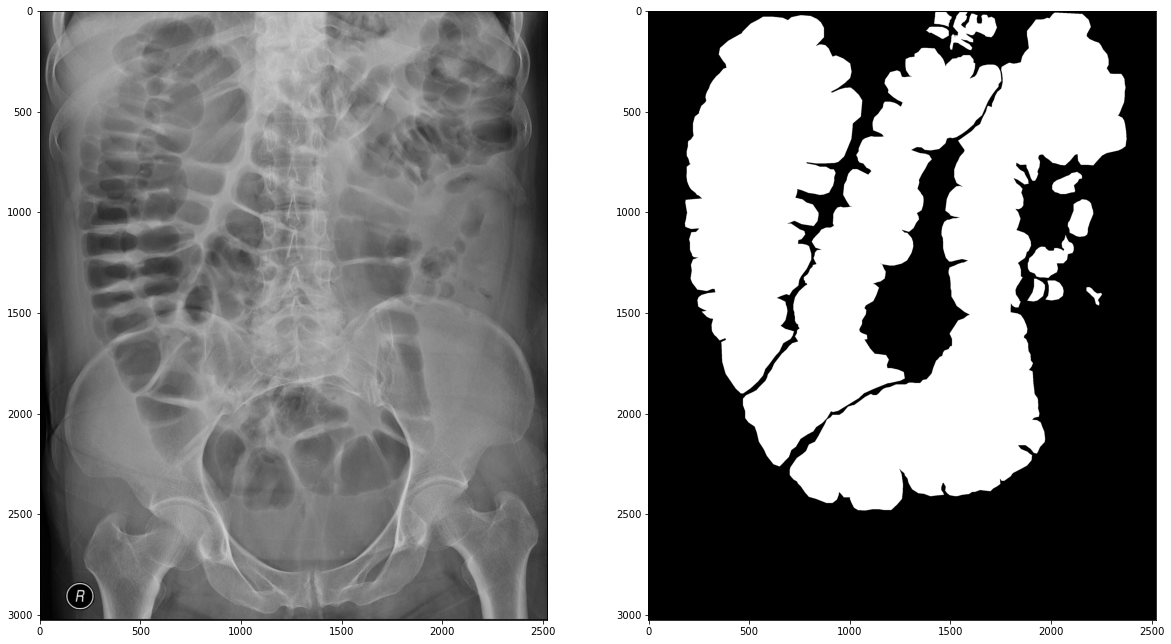

In [28]:
r_index = 0
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(images[r_index][0], cmap="gray")
axarr[1].imshow(images[r_index][1], cmap="gray");

In [29]:
a = Augmentor.DataPipeline(images)

In [30]:
a.random_distortion(probability=1, grid_width=50, grid_height=50, magnitude=15)
a.gaussian_distortion(probability=1, grid_width=10, grid_height=10, magnitude=10, corner='bell', method='in ')

In [31]:
augmented_images = a.sample(2)

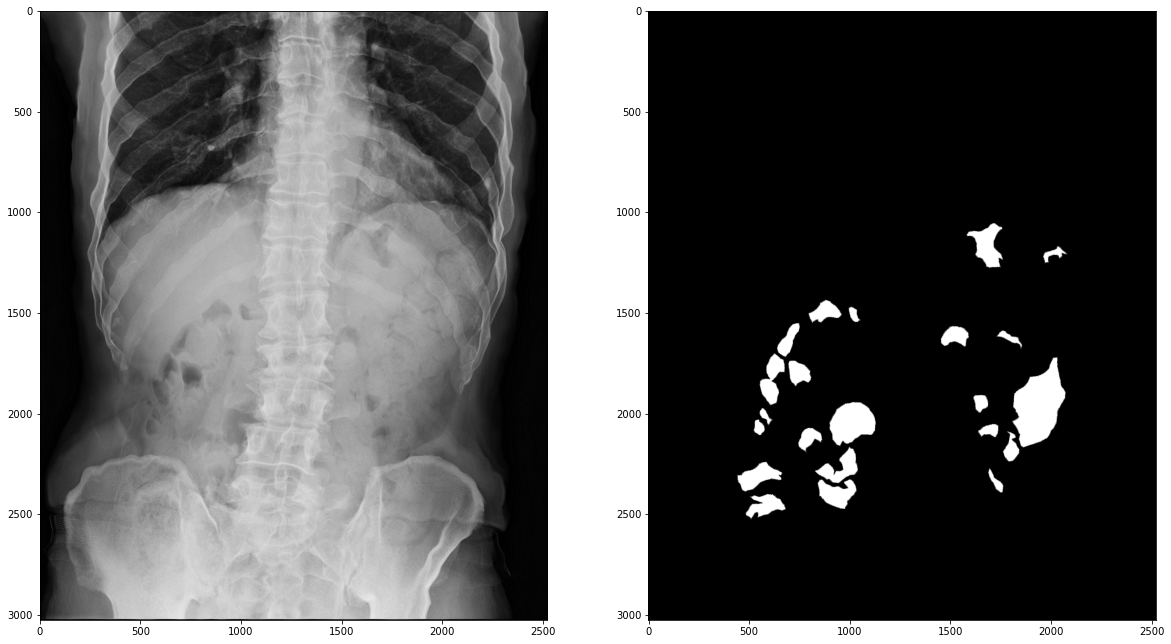

In [32]:
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(augmented_images[0][0], cmap="gray")
axarr[1].imshow(augmented_images[0][1], cmap="gray");

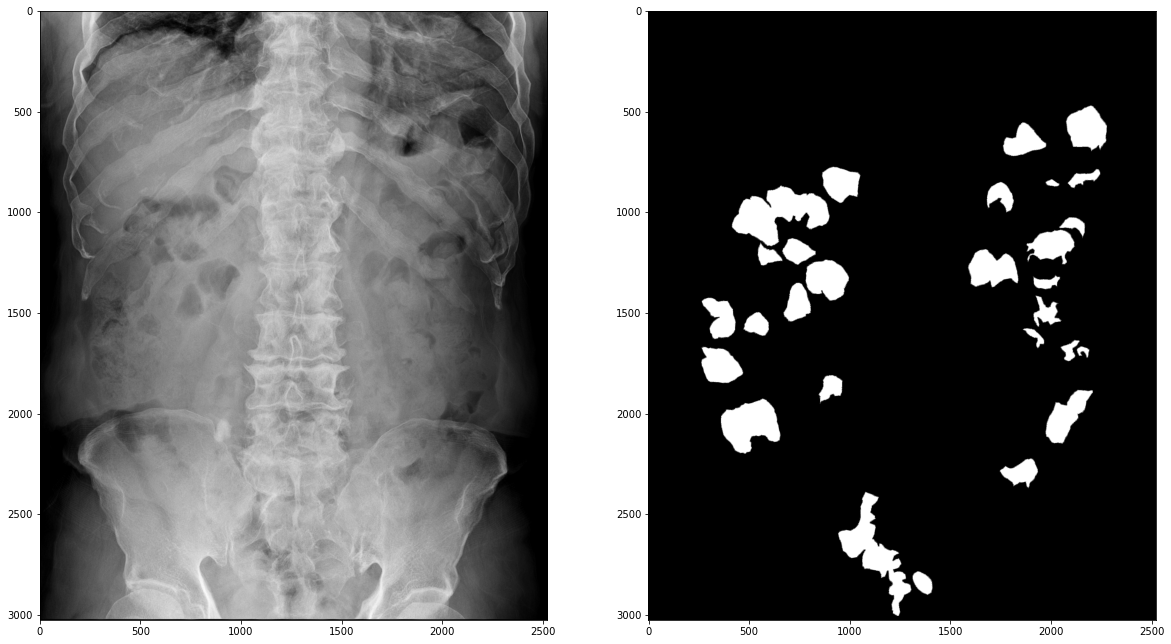

In [33]:
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(augmented_images[1][0], cmap="gray")
axarr[1].imshow(augmented_images[1][1], cmap="gray");

In [34]:
augmented_images[0]

[array([[43, 44, 44, ..., 12,  0,  0],
        [40, 39, 39, ..., 10,  0,  0],
        [44, 43, 41, ..., 11,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [35]:
r_index = random.randint(0, len(augmented_images)-1)

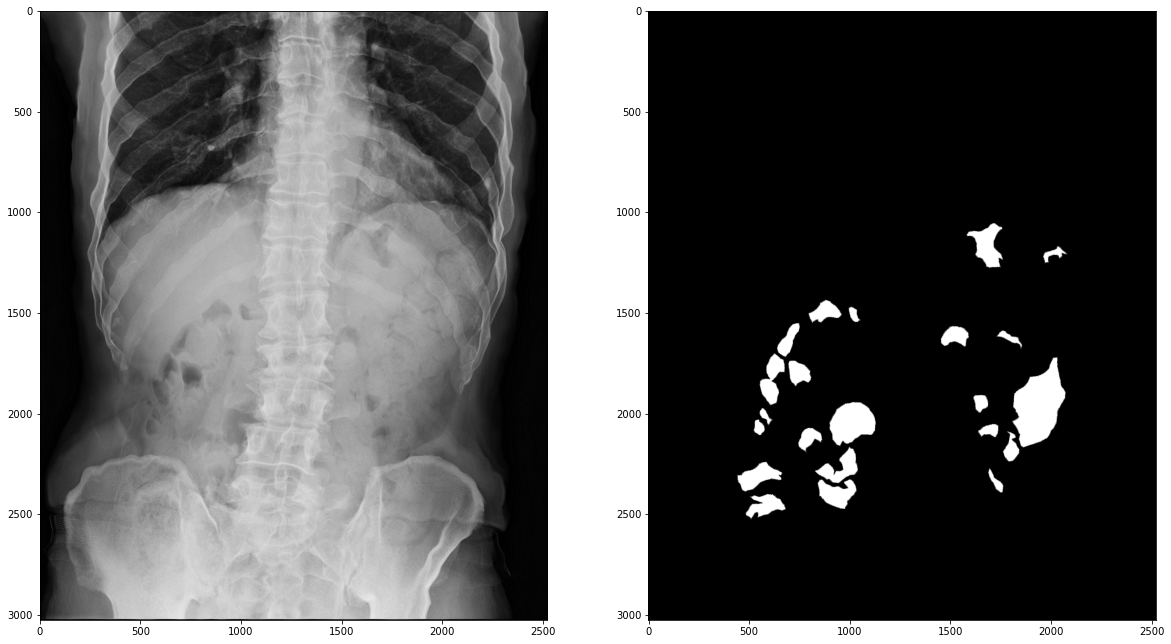

In [36]:
r_index = random.randint(0, len(augmented_images)-1)
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(augmented_images[r_index][0], cmap='gray')
axarr[1].imshow(augmented_images[r_index][1], cmap="gray");
